# Generalized Linear Models
* http://scikit-learn.org/stable/modules/linear_model.html

In [19]:
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([ 0.5,  0.5])

# Quiz: Age/Net Worth Regression in Sklearn

In [4]:
def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    ### name your regression reg
    
    ### your code goes here!
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(ages_train, net_worths_train)
    
    return reg

In [6]:
#!/usr/bin/python

import numpy
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
from class_vis import prettyPicture, output_image

from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



reg = studentReg(ages_train, net_worths_train)


plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")


plt.savefig("test.png")
output_image("test.png", "png", open("test.png", "rb").read())

ImportError: No module named class_vis

# Quiz: Now You Practice Extracting Information
* Type of errors on regressions
* How to quantify them

In [7]:
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [23]:
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

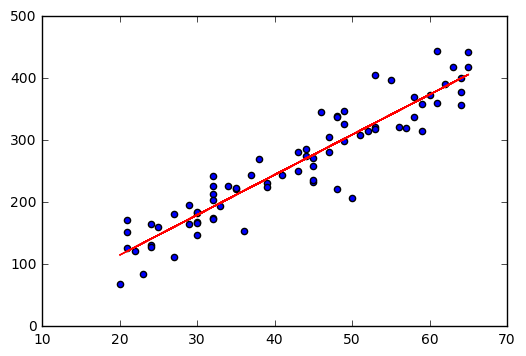

In [24]:
r = LinearRegression()
r.fit(ages_train, net_worths_train)
plt.plot(ages_train, r.predict(ages_train), color='red', linewidth=1)
plt.scatter(ages_train, net_worths_train)

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict(27)[0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_ ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_ ### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train) ### fill in the line of code to get the right value

In [31]:
def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

In [32]:
print submitFit()

{'slope': array([[ 6.47354955]]), 'stats on training': 0.87458823582171819, 'intercept': array([-14.35378133]), 'stats on test': 0.81236573057499983, 'networth': array([ 160.43205651])}


# Error
$$
Error = Actual Value - Predicted Value
$$

# Quiz: Error Quiz

In [33]:
200-218.75

-18.75

# Quiz: Errors and Fit Quality
What a good fit minimize?
<input type="checkbox" />Error on first and last data points <br />
<input type="checkbox" />Sum Error on all data points <br />
<input type="checkbox" />Sum Abs(Error) on all data points <br />
<input type="checkbox" />Sum Error^2 on all data points <br />



# Several Algorithms
* Ordinary Least Squares (OLS)
    * Used in sklearn
* Gradient Descent